The coefficients are:  [1.57334128e-03 2.47077891e-04 2.24616027e-07]


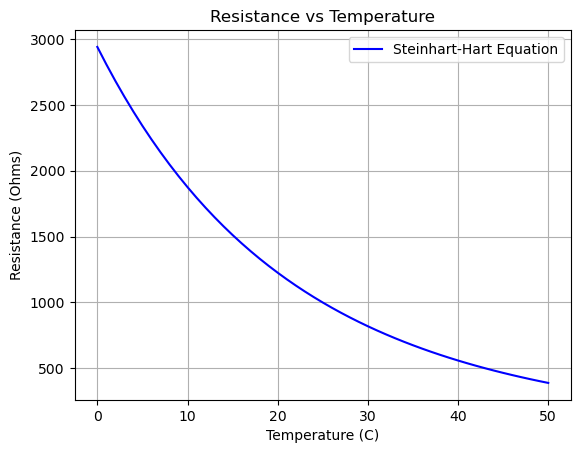

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Given data
temp = np.array([-50, -40, -30, -20, -10, 0, 10, 
                20, 25, 30, 40, 50, 60, 70, 80, 
                90, 100, 110, 120, 130, 140, 150])

temp_k = temp + 273.15

resistance = np.array([44130, 23980, 13520, 7981, 4754, 2949, 
                    1879, 1226, 1000, 819.4, 559.2, 389.3, 276, 
                    199, 145.8, 108.4, 81.68, 62.35, 48.18, 37.64, 
                    29.72, 23.7])

#==============================================================================
# Calculate the Steinhart-Hart coefficients
#==============================================================================

# Operating Range of the Thermistor is from 20 to 40 degree Celsius (30C as midpoint)

R1 = 1226 # 20C
R2 = 819.4 # 30C
R3 = 559.2 # 40C

# Create a 3x3 matrix
A = np.array([[1, np.log(R1), (np.log(R1))**3], 
              [1, np.log(R2), (np.log(R2))**3],
              [1, np.log(R3), (np.log(R3))**3]]) 

B = np.array([1 / (temp_k[((np.where(resistance == R1)[0][0]))]),    # Find the index of the resistance value
              1 / (temp_k[((np.where(resistance == R2)[0][0]))]),
              1/ (temp_k[((np.where(resistance == R3)[0][0]))])])

# Solve for the coefficients
coeff = np.linalg.solve(A, B)
print("The coefficients are: ", coeff)

A = coeff[0]
B = coeff[1]
C = coeff[2]

# plot the data with the curve fit
def steinhart_hart_equation(T):
    y = (A - (1/(T + 273.151))) / C
    x = np.sqrt(((B / (3*C))**3) + ((y**2) / 4))
    return np.exp(((x - (y/2))**(1/3)) - ((x + (y/2))**(1/3)))

steinhart_hart_resistance = steinhart_hart_equation(temp)

# Plot the data from 0C to 50C
temp = np.arange(0, 51, 1)
steinhart_hart_resistance = steinhart_hart_equation(temp)
plt.plot(temp, steinhart_hart_resistance, 'b-', label='Steinhart-Hart Equation')

# include data from 0 to 50C FROM THE GIVEN DATA
resistance = steinhart_hart_equation(temp)
plt.xlabel('Temperature (C)')
plt.ylabel('Resistance (Ohms)')
plt.title('Resistance vs Temperature')
plt.grid(True)
plt.legend()
plt.show()



In [5]:
# Estimate Resistance at 35C
R35 = steinhart_hart_equation(35)
print("The estimated resistance at 35C is: ", R35)

# 3 point calibration around 30C
R1 = 1000   # 25C
R2 = 819.4  # 30C
R3 = R35    # 35C

R_parallel = ((R2 * (R1 + R3)) - (2 * R1 * R3)) / (R1 + R3 - (2 * R2))
print("The resistance in parallel is: ", R_parallel)

The estimated resistance at 35C is:  675.1825124263769
The resistance in parallel is:  612.3690845843522


In [6]:
R3 = 820
R_parallel = 612.37
Vin = 5
Vout_INA = 1.09
Gain = 4.266
beta = 3636
T0 = 298.15

Vout_wheatstone = (Vout_INA - 5) / Gain
print("The Vout of the wheatstone bridge is: ", Vout_wheatstone)

Rs = ((R_parallel * R3)*(Vin + 2*Vout_wheatstone)) / (R_parallel*(Vin - 2*Vout_wheatstone) - R3*(Vin + 2*Vout_wheatstone))
print("The resistance of the thermistor is: ", Rs)

Temperature = beta / (np.log(Rs / (1000*np.exp(-beta/T0))))
print("The temperature is: ", Temperature - 273.15)


The Vout of the wheatstone bridge is:  -0.9165494608532584
The resistance of the thermistor is:  1001.7086791648225
The temperature is:  24.958267470179578
